In [159]:
import pandas as pd
import numpy as np

#Download the employees.csv file and load it in a DataFrame called csv_df using Pandas. 
csv_df = pd.read_csv("employees.csv")
print(csv_df.head(5))

  First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
0    Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
1     Thomas    Male  3/31/1996         6:53 AM   61933    4.170   
2      Maria  Female  4/23/1993        11:17 AM  130590   11.858   
3      Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
4      Larry    Male  1/24/1998         4:47 PM  101004    1.389   

  Senior Management             Team  
0              True        Marketing  
1              True              NaN  
2             False          Finance  
3              True          Finance  
4              True  Client Services  


In [10]:
#Filter the rows that include any NaN value (if any) and put the result in a new DataFrame called noNaN_df.
noNaN_df = csv_df.dropna(axis = 0, how = 'any')
print(noNaN_df.head(5))


In [12]:
#Get all the duplicated rows (if any) and assign the result to a new DataFrame called duplicated_df.
duplicated_df = csv_df[csv_df.duplicated()]
print(duplicated_df.head(5))

Empty DataFrame
Columns: [First Name, Gender, Start Date, Last Login Time, Salary, Bonus %, Senior Management, Team]
Index: []


In [18]:
#Build a dummy matrix of Team values for the last 20 rows of the dataset
dummy_df = pd.get_dummies(csv_df.tail(20)['Team'])
print(dummy_df)


In [37]:
#Get the unique values of the Team column, then create a mapping for building of each team as follows: 
import pandas as pd
import numpy as np

csv_df['Team'].unique()

teams_blgs = {'Marketing': 'Building1',
 'Client Services': 'Building1',
 'Product': 'Building1',
 'Sales': 'Building1',
 'NaN': 'Building1',
 'Finance': 'Building2',
 'Legal': 'Building2',
 'Human Resources': 'Building2',
 'Engineering': 'Building3',
 'Business Development': 'Building3',
 'Distribution': 'Building4',
 'NaN': 'Administration'}

all_teams = csv_df['Team']
all_teams
#print(all_teams)
csv_df['location'] = all_teams.map(teams_blgs)
#print(csv_df)



In [47]:
#Divide the salaries into 4 bins (consider the minimum and maximum), then show how many people are in each salary category. 
#Here you use the pd.cut and create the Bins
csv_df['Salary'].max()
csv_df['Salary'].min()
bins = [35000, 70000, 100000 ,125000, 150000]
groups = pd.cut(csv_df['Salary'],bins)
pd.value_counts(groups)


(35000, 70000]      319
(70000, 100000]     272
(100000, 125000]    217
(125000, 150000]    192
Name: Salary, dtype: int64

In [52]:
#Assuming that bonuses higher than 9.3% are outliers, find and show all of the rows that are outliers. 
#You can filter the data frame
csv_df[csv_df['Bonus %'] > 9.3]


In [65]:
#Get all the rows whose first name starts with the letter "S". 
#Hint: first create a boolean indexing of the column "First Name" based on whether they start with the letter "S" 
#or not (you should consider NaN values too otherwise you will get errors). 
#Then try to filter the DataFrame using that Boolean series. 

bindex = noNaN_df['First Name'].str.startswith('S')
#print(bindex)

noNaN_df[bindex]


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
17,Shawn,Male,12/7/1986,7:45 PM,111737,6.414,False,Product
38,Stephanie,Female,9/13/1986,1:52 AM,36844,5.574,True,Business Development
54,Sara,Female,8/15/2007,9:23 AM,83677,8.999,False,Engineering
65,Steve,Male,11/11/2009,11:44 PM,61310,12.428,True,Distribution
82,Steven,Male,3/30/1980,9:20 PM,35095,8.379,True,Client Services
83,Shawn,Male,9/23/2005,2:55 AM,148115,6.539,True,Finance
107,Steven,Male,4/23/2013,10:12 PM,68680,16.565,False,Legal
110,Shirley,Female,6/20/2001,10:39 PM,147113,16.135,False,Legal
117,Steven,Male,3/1/1995,3:03 PM,109095,9.494,False,Finance
130,Shirley,Female,5/1/1984,1:15 PM,41334,6.219,True,Human Resources


In [68]:
#Retrieve the first 3 columns of 10 rows and create a hierarchically indexed Series based on that. 
#Here you are creating a hierarchially indexed series using a pandas series and index based on gender.
hdf = csv_df.iloc[0:10,0:3]
print(hdf)

hs = pd.Series(['Douglas','Thomas', 'Maria','Jerry','Larry','Dennis',' Ruby','NaN','Angela','Frances'],
                 index=[['Male','Male','Female','Male','Male','Male','Female','Female','Female','Female'],
                        [1,2,1,3,4,5,2,3,4,5]])
hs

  First Name  Gender  Start Date
0    Douglas    Male    8/6/1993
1     Thomas    Male   3/31/1996
2      Maria  Female   4/23/1993
3      Jerry    Male    3/4/2005
4      Larry    Male   1/24/1998
5     Dennis    Male   4/18/1987
6       Ruby  Female   8/17/1987
7        NaN  Female   7/20/2015
8     Angela  Female  11/22/2005
9    Frances  Female    8/8/2002


Male    1    Douglas
        2     Thomas
Female  1      Maria
Male    3      Jerry
        4      Larry
        5     Dennis
Female  2       Ruby
        3        NaN
        4     Angela
        5    Frances
dtype: object

In [71]:
#Calculate the average of salary and bonus based on the Team.
#Here you are using the group command
grouped1 = csv_df['Salary'].groupby(csv_df['Team'])
grouped1.mean()

Team
Business Development    91866.316832
Client Services         88224.424528
Distribution            88500.466667
Engineering             94269.195652
Finance                 92219.480392
Human Resources         90944.527473
Legal                   89303.613636
Marketing               90435.591837
Product                 88665.505263
Sales                   92173.436170
Name: Salary, dtype: float64

In [89]:
#Create a function called top() that takes a DataFrame as an input and  returns the 5 highest paid entries in the DataFrame. 
#Then use the top() function to get the 5 highest paid people of each Gender.
#Write a simple function in the data processing steps.
def top(df):
    return df.nlargest(5, 'Salary')
  

#df1 = (csv_df.loc[csv_df['Gender'] == 'Male'])
top((csv_df.loc[csv_df['Gender'] == 'Male']))
top((csv_df.loc[csv_df['Gender'] == 'Female']))

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,location
644,Katherine,Female,8/13/1996,12:21 AM,149908,18.912,False,Finance,Building2
429,Rose,Female,5/28/2015,8:40 AM,149903,5.630,False,Human Resources,Building2
828,Cynthia,Female,7/12/2006,8:55 AM,149684,7.864,False,Product,Building1
186,NaN,Female,2/23/2005,9:50 PM,149654,1.825,NaN,Sales,Building1
160,Kathy,Female,3/18/2000,7:26 PM,149563,16.991,True,Finance,Building2


In [93]:
#Create a Categorical variable based on Team column and show how many values per each Team exists.
#Here you create a category for teams uing the astype category.
Team_cat = csv_df['Team'].astype('category')
Team_cat.value_counts()

Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64

In [106]:
#Create a new variable called teams_salaries and group only the two columns of Salary and 
#Team of the csv_df based on the Team values. Then using the new teams_salaries values, 
#replace each row's salary by its Team average salary. 
grouped1 = csv_df['Salary'].groupby(csv_df['Team'])
#print(grouped1)
teams_salaries = grouped1.mean()
#print(teams_salaries)
#cpu_grouped.transform(lambda x: x.mean())
#grouped1.transform(lambda x: x.mean())

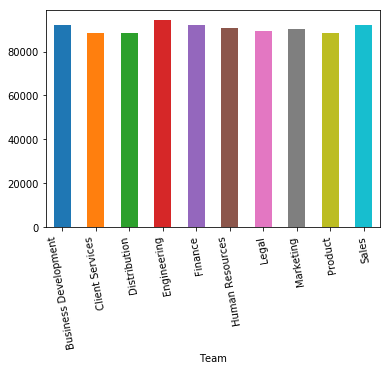

In [118]:
#Plot the team salaries in a single plot and using the bar plot type where X-Axis is the Team and 
#Y-Axis is the average salary. Change the X-labels to match the team name.   
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
teams_salaries.plot.bar(x='Teams', y='Salaries', rot=100)
plt.show()

In [166]:
#Use to_datetime() function of pandas to convert the Start Date column to a Series of datetime objects. 
#pd.to_datetime(csv_df['Start Date'])
time_rng = pd.to_datetime(csv_df['Start Date'])
#print(sdate)

In [167]:
#Use the result of previous task to create a Time Series of Bonuses (Let's assume the whole bonus column belongs to a 
#single person and is changing through time). 
from datetime import datetime

#time_series = pd.Series(csv_df['Bonus %'].values,index=csv_df['Start Date'])
time_series = pd.Series(csv_df['Bonus %'].values,index=time_rng)
time_series


Start Date
1993-08-06     6.945
1996-03-31     4.170
1993-04-23    11.858
2005-03-04     9.340
1998-01-24     1.389
1987-04-18    10.125
1987-08-17    10.012
2015-07-20    11.598
2005-11-22    18.523
2002-08-08     7.524
1980-08-12    15.132
1997-10-26    12.637
1980-12-01    17.492
2008-01-27     5.831
1999-01-14    14.543
2016-06-05     1.256
2010-09-21     7.369
1986-12-07     6.414
1981-10-23    19.082
2010-07-22     1.894
1995-04-22     4.934
1995-09-05    13.645
2012-03-08    18.816
2012-06-14     5.042
1992-07-01    13.873
2012-10-08    18.576
2000-02-27     7.757
1991-07-11     5.218
1981-11-27    13.464
2005-01-26     7.008
               ...  
1988-09-03    15.397
2002-12-30     5.368
2006-07-28    11.159
2013-05-10    11.105
2011-08-30    16.455
1995-04-07    12.467
1992-10-19     4.195
1995-12-04     5.949
1983-01-17    11.178
2013-07-20    13.198
2013-01-26     8.862
1993-01-15    19.280
1982-04-06     8.639
1982-12-23    11.738
2011-10-15    13.040
1983-07-10     1.909
19

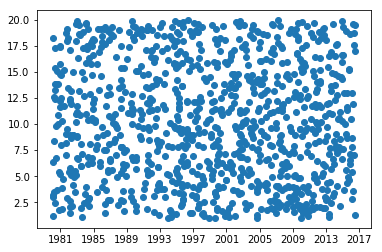

In [168]:
#Plot the time series where X-Axis is the time and Y-Axis is the bonus value and user Scatter plot for better presentation. 
#Change the color and marker from default to your desired values. 
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(time_series.index,time_series)
plt.show()


In [173]:
#After creating the new Time Series object, print the bonus values before January 1st of 2008.  
time_series[:'2008/1/1']





Start Date
1993-08-06     6.945
1996-03-31     4.170
1993-04-23    11.858
2005-03-04     9.340
1998-01-24     1.389
1987-04-18    10.125
1987-08-17    10.012
2005-11-22    18.523
2002-08-08     7.524
1980-08-12    15.132
1997-10-26    12.637
1980-12-01    17.492
1999-01-14    14.543
1986-12-07     6.414
1981-10-23    19.082
1995-04-22     4.934
1995-09-05    13.645
1992-07-01    13.873
2000-02-27     7.757
1991-07-11     5.218
1981-11-27    13.464
2005-01-26     7.008
2002-08-06     9.096
2005-02-20    12.752
1998-08-21     6.417
1993-12-18    16.180
2004-01-10    19.096
2006-10-10    16.675
1981-10-19     9.557
1986-09-13     5.574
               ...  
1983-05-21    10.833
1980-01-19     1.148
1986-10-17     8.115
1984-02-03    15.901
1987-10-24     9.631
1992-09-19     5.850
1989-10-29    18.093
1989-06-18     3.050
1994-09-23    17.940
1980-05-07    12.391
1989-09-25    18.393
1995-03-27    11.671
1988-09-03    15.397
2002-12-30     5.368
2006-07-28    11.159
1995-04-07    12.467
19

In [170]:
#Downsample the Time Series by intervals of 3 months and based on averaging the bonuses. 
time_series.resample('3M',closed='right').sum()


Start Date
1980-01-31     10.521
1980-04-30     72.988
1980-07-31     81.542
1980-10-31     49.898
1981-01-31    124.454
1981-04-30     28.508
1981-07-31     31.627
1981-10-31     92.531
1982-01-31     37.142
1982-04-30    101.468
1982-07-31     39.220
1982-10-31     13.818
1983-01-31    130.938
1983-04-30     74.457
1983-07-31     67.402
1983-10-31     56.047
1984-01-31     39.703
1984-04-30    106.926
1984-07-31     68.640
1984-10-31     93.985
1985-01-31    112.426
1985-04-30     28.136
1985-07-31     55.171
1985-10-31     42.631
1986-01-31    101.099
1986-04-30     40.102
1986-07-31     63.790
1986-10-31     86.943
1987-01-31     46.738
1987-04-30     64.207
               ...   
2009-04-30     98.161
2009-07-31     87.568
2009-10-31    102.424
2010-01-31    106.794
2010-04-30    101.021
2010-07-31     56.331
2010-10-31     95.868
2011-01-31      1.620
2011-04-30     62.164
2011-07-31     82.886
2011-10-31     85.483
2012-01-31     77.914
2012-04-30    124.788
2012-07-31     73.245